In [1]:
import dblpy as dblp # pip3 install dblpy-lib

import pandas as pd
import yaml

import matplotlib.pyplot as plt

import datetime
import numpy as np

import pickle

In [2]:
# read yaml file
with open('config/keywords.yaml', 'r') as file:
    keywords = yaml.safe_load(file)

assert ' ' not in keywords['privacy-and-security']
assert '-' not in keywords['privacy-and-security']
assert ' ' not in keywords['robotics']
assert '-' not in keywords['robotics']
assert all(k.lower() == k for k in keywords['privacy-and-security'])
assert all(k.lower() == k for k in keywords['robotics'])

keywords_privacy_security = '|'.join(keywords['privacy-and-security'])
keywords_robotics = '|'.join(keywords['robotics'])

QUERY = f"title:{keywords_privacy_security} title:{keywords_robotics}"
print(QUERY)

title:priva|secur|leakage|anonym|dp|smpc|blockchain|crypt|encrypt|homomorphic|federated|obfuscat|confidenti title:robot|autonomous|driving|vehicle|drone|vacuum|rover|auv|uav|ugv|usv|agv|driverless|robotaxi|cobot|swarm


In [3]:
#QUERY = '(privacy | private) & robot'
#QUERY = 'privacy | private & robot'
#QUERY = 'multi-party computation'
#QUERY = 'title: rover | how'

JOURNALS = 'type:Journal_Articles:'
CONFERENCE = 'type:Conference_and_Workshop_Papers:'

publications = []
print('fetching journal articles...')
journals = dblp.get_publications(q=f'{QUERY} {JOURNALS}', max_results=10000)
print(f'done: {len(journals)}')

print('fetching conference papers...')
conferences = dblp.get_publications(q=f'{QUERY} {CONFERENCE}', max_results=10000)
print(f'done: {len(conferences)}')

publications = journals + conferences
print(f'total publications: {len(publications)}')

fetching journal articles...
done: 3256
fetching conference papers...
done: 2570
total publications: 5826


In [4]:
now = datetime.datetime.now().strftime(r"%Y-%m-%d_%H-%M-%S")
pickle.dump(publications, open(f'outputs/publications/{now}.pkl', 'wb'))

In [5]:
lines = []
for p in publications:
    line = p.title #+ '; ' + ', '.join(p.authors)
    line = line.lower()
    lines.append(line)

In [6]:
now = datetime.datetime.now().strftime(r"%Y-%m-%d_%H-%M-%S")
with open(f'outputs/title-label/{now}.txt', 'w') as f:
    for l in lines:
        for k in keywords['robotics']:
            l = l.replace(k, f'**{k}**')
        for k in keywords['privacy-and-security']:
            l = l.replace(k, f'^^{k}^^')
        print(l, file=f)

6552

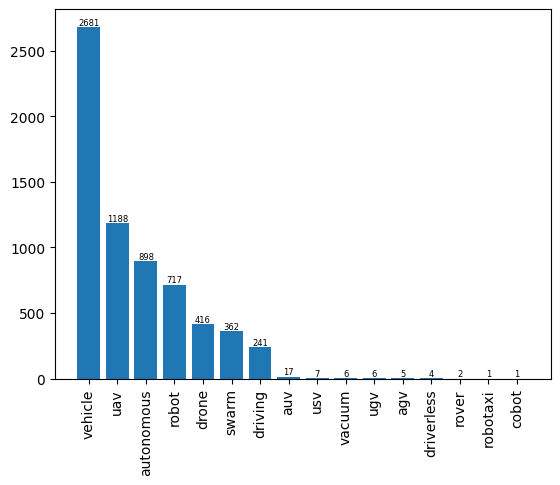

In [7]:
histogram_data = {}
for k in keywords['robotics']:
    count = sum([k in line for line in lines])
    histogram_data[k] = count

labels,values = zip(*sorted(histogram_data.items(),key=lambda x:x[1],reverse=True))

display(sum(values))

# Create the bar chart
plt.bar(labels, values)

# write count above each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=6)

# xlabels at 90 degrees
plt.xticks(rotation=90)
plt.show()

6879

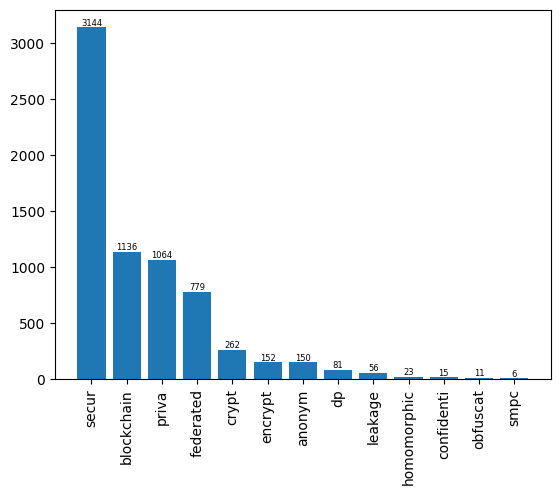

In [8]:
histogram_data = {}
for k in keywords['privacy-and-security']:
    count = sum([k in line for line in lines])
    histogram_data[k] = count

labels,values = zip(*sorted(histogram_data.items(),key=lambda x:x[1],reverse=True))

display(sum(values))

# Create the bar chart
plt.bar(labels, values) #, color='skyblue', edgecolor='black')

# write count above each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=6)

# xlabels at 90 degrees
plt.xticks(rotation=90)
plt.show()

np.int64(5826)

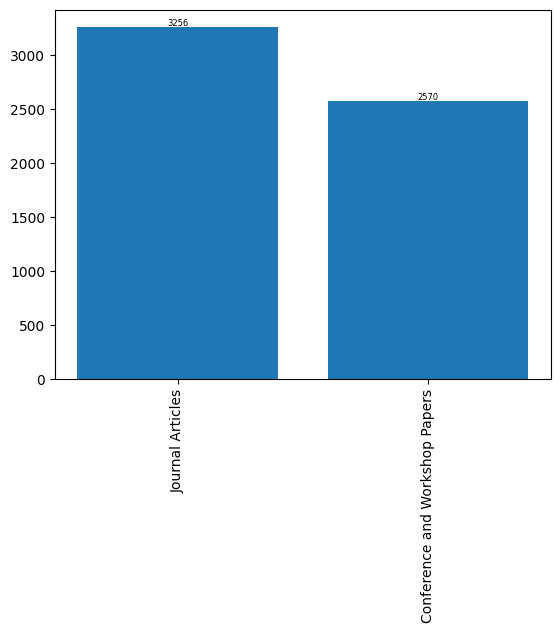

In [9]:
types = [p.type for p in publications]

# numpy count number of occurrences of each type
res = np.unique(types, return_counts=True)
(unique, counts) = res

histogram_data = dict(zip(unique, counts))

labels,values = zip(*sorted(histogram_data.items(),key=lambda x:x[1],reverse=True))

display(sum(values))

# Create the bar chart
plt.bar(labels, values) #, color='skyblue', edgecolor='black')

# write count above each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=6)

# xlabels at 90 degrees
plt.xticks(rotation=90)
plt.show()

In [10]:
p.__dict__

{'title': 'A Security Guard Robot Which Patrols Map Information.',
 'venue': 'IROS',
 'volume': '',
 'number': '',
 'pages': '504-511',
 'publisher': '',
 'year': '1989',
 'type': 'Conference and Workshop Papers',
 'access': 'closed',
 'key': 'conf/iros/KajiwaraYK89',
 'doi': '10.1109/IROS.1989.637950',
 'ee': 'https://doi.org/10.1109/IROS.1989.637950',
 'url': 'https://dblp.org/rec/conf/iros/KajiwaraYK89',
 'authors': ['Teijiro Kajiwara',
  'Jun&apos;ichi Yamaguchi',
  'Jun&apos;ichi Kanemoto']}

np.int64(2016)

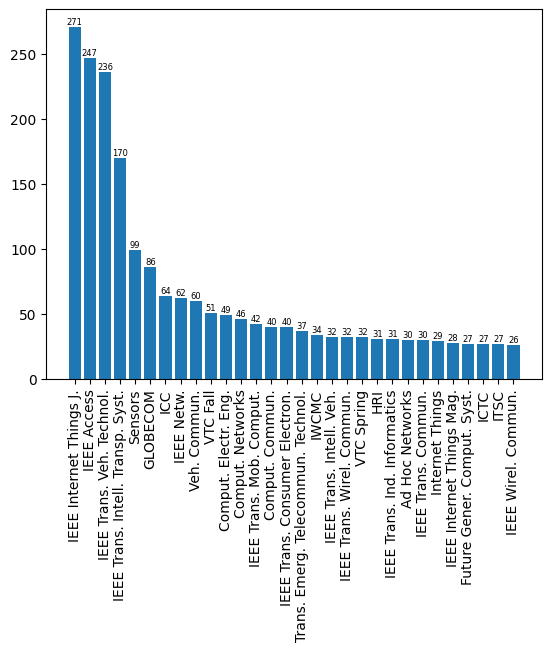

In [11]:
venues = [p.venue for p in publications]

# numpy count number of occurrences of each venue
res = np.unique(venues, return_counts=True)
(unique, counts) = res

histogram_data = dict(zip(unique, counts))

labels,values = zip(*sorted(histogram_data.items(),key=lambda x:x[1],reverse=True))
labels = labels[:30]
values = values[:30]

display(sum(values))

# Create the bar chart
plt.bar(labels, values) #, color='skyblue', edgecolor='black')

# write count above each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=6)

# xlabels at 90 degrees
plt.xticks(rotation=90)
plt.show()

In [12]:
# ONLY_PRINT_IF_CONTAINS = 'federated'
# now = datetime.datetime.now().strftime(r"%Y-%m-%d_%H-%M-%S")
# with open(f'outputs/{now}.txt', 'w') as f:
#     for l in lines:
#         for k in keywords['robotics']:
#             l = l.replace(k, f'**{k}**')
#         for k in keywords['privacy-and-security']:
#             l = l.replace(k, f'^^{k}^^')
#         if (ONLY_PRINT_IF_CONTAINS is None) or (ONLY_PRINT_IF_CONTAINS in l):
#             print(l, file=f)